Questions:

???????????????????????????????????

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv('data/full_data.csv', engine= 'python')
#df.columns
#max(df['phenocluster'])
df.head()

,ImageNumber,ROInr,Cell_Area,Nucl_Area,X80ArAr_Mean,sSMA113_Mean,aSMA_Mean,X124Xe_Mean,X127I_Mean,X129Xe_Mean,...,phenocluster,index.x,index.y,Slide,Patient,Status.simple,cx,cy,nx,ny
0,20200731_MBAA047_S11_R-4_D-S11_T59_R1,1,232,122,"5,94769102585868","0,0128861485992438","0,351471207519938","0,496079401763715","2,24891296330452","2,96938086908198",...,19,59,59,11,5,Dysplastic,587.344828,527.500000,588.008197,528.024590
1,20200731_MBAA047_S11_R-4_D-S11_T59_R1,2,66,42,"5,95240191254949","0,022503800575832","0,28432046338496","0,553486863341693","2,24426482497145","2,99401084194055",...,19,59,59,11,5,Dysplastic,478.590909,529.742424,477.833333,530.309524
2,20200731_MBAA047_S11_R-4_D-S11_T59_R1,3,174,58,"5,95082993060535","0,00861519475862809","0,243111849066537","0,401599552619976","2,2490319725307","2,97628522417339",...,19,59,59,11,5,Dysplastic,101.166667,528.936782,101.775862,529.189655
3,20200731_MBAA047_S11_R-4_D-S11_T59_R1,4,186,72,"5,94954944619245","0,0453151121207948","0,353890511871444","0,593056099449522","2,22853143953012","2,96928636764223",...,6,59,59,11,5,Dysplastic,214.059140,531.478495,212.833333,529.444444
4,20200731_MBAA047_S11_R-4_D-S11_T59_R1,5,78,48,"5,9472964744642",0,"0,16683716198276","0,588930304085899","2,21490712237399","2,94503771875414",...,19,59,59,11,5,Dysplastic,279.346154,529.115385,280.375000,529.125000


In [3]:
from pandas.api.types import is_numeric_dtype

for c in df.columns[1:]:
    if not is_numeric_dtype(df[c]):
        #print(c)
        df[c] = df[c].apply(lambda x: float(x.split()[0].replace(',','.')))

ValueError: could not convert string to float: 'Stroma'

In [4]:
dfn = df._get_numeric_data()
normalized_df=(dfn-dfn.mean())/dfn.std()
normalized_df.head()

,ROInr,Cell_Area,Nucl_Area,X80ArAr_Mean,sSMA113_Mean,aSMA_Mean,X124Xe_Mean,X127I_Mean,X129Xe_Mean,X132Xe_Mean,...,noise_Mean,phenocluster,index.x,index.y,Slide,Patient,cx,cy,nx,ny
0,-0.826798,0.540902,1.024646,-1.210643,-0.543700,-0.749640,-1.111395,-1.120603,-1.240271,-1.243359,...,-0.269650,1.754623,0.331639,0.331639,0.60563,0.476771,0.114260,-0.130533,0.115972,-0.129103
1,-0.826596,-1.125167,-0.889237,-1.208242,-0.508413,-0.810904,-0.929994,-1.126718,-1.214758,-1.289593,...,1.552482,1.754623,0.331639,0.331639,0.60563,0.476771,-0.193018,-0.125039,-0.195324,-0.123506
2,-0.826393,-0.041219,-0.506461,-1.209043,-0.559370,-0.848500,-1.409939,-1.120446,-1.233119,-1.236333,...,-0.360345,1.754623,0.331639,0.331639,0.60563,0.476771,-1.259409,-0.127013,-1.257866,-0.126249
3,-0.826191,0.079220,-0.171531,-1.209696,-0.424720,-0.747432,-0.804960,-1.147415,-1.240369,-1.243185,...,-0.247221,-0.609149,0.331639,0.331639,0.60563,0.476771,-0.940437,-0.120786,-0.944076,-0.125625
4,-0.825989,-1.004728,-0.745696,-1.210844,-0.590978,-0.918089,-0.817997,-1.165338,-1.265487,-1.246136,...,-0.360345,1.754623,0.331639,0.331639,0.60563,0.476771,-0.755973,-0.126576,-0.753238,-0.126407


In [5]:
mask = df['ImageNumber'] == '20210808_MBAA047_S8_R-2_D-S8_T42_R4'
df1 = normalized_df[mask]
df1.head()

,ROInr,Cell_Area,Nucl_Area,X80ArAr_Mean,sSMA113_Mean,aSMA_Mean,X124Xe_Mean,X127I_Mean,X129Xe_Mean,X132Xe_Mean,...,noise_Mean,phenocluster,index.x,index.y,Slide,Patient,cx,cy,nx,ny
335423,-0.826798,-1.386117,-0.937084,-1.397043,0.991195,0.885831,-1.040891,-1.368193,-1.371195,-1.334043,...,-0.360345,-0.427321,-0.14373,-0.14373,-0.019551,-0.024494,0.379301,3.304549,0.379142,3.304634
335424,-0.826596,-1.345971,-1.319861,-1.393908,0.847272,0.527960,-2.091577,-1.290035,-1.371538,-1.386832,...,-0.360345,0.118165,-0.14373,-0.14373,-0.019551,-0.024494,-1.134147,3.299159,-1.133382,3.298632
335425,-0.826393,-0.502900,-0.506461,-1.391478,0.616863,0.597647,-1.065141,-1.323911,-1.356021,-1.384355,...,-0.360345,1.754623,-0.14373,-0.14373,-0.019551,-0.024494,2.915905,3.294030,2.914486,3.294092
335426,-0.826191,-0.964582,-0.937084,-1.389735,-0.590978,-0.531761,-1.018813,-1.335929,-1.382344,-1.341635,...,-0.360345,-0.972807,-0.14373,-0.14373,-0.019551,-0.024494,2.706870,3.291810,2.705922,3.293610
335427,-0.825989,-0.362388,-0.123684,-1.393912,0.407270,0.580884,-0.898187,-1.329248,-1.376512,-1.376478,...,-0.360345,0.118165,-0.14373,-0.14373,-0.019551,-0.024494,3.154915,3.289636,3.155360,3.291895


In [6]:
df['ImageNumber'].value_counts()

20210808_MBAA047_S8_R-2_D-S8_T42_R4       29966
20210805_MBAA047_S1_R-1_D-S1_T2_R1,2,3    14016
20210731_MBAA047_S3_R-1_D-S3_T17_R1,2     13958
20210802_MBAA047_S2_R-2_D-S2_T14_R1       13921
20210801_MBAA047_S5_R-3_D-S5_T23_R1       11392
                                          ...  
20210728_MBAA47_S10_R-7_D-S10_T50_R4       1409
20210805_MBAA047_S7_R-3_D-S7_T35_R3        1313
20210730_MBAA047_S15_R-5_D-S15_T113_R2     1277
20210802_MBAA047_S9_R-2_D-S9_T47_R2        1144
20210802_MBAA047_S9_R-3_D-S9_T47_R3         752
Name: ImageNumber, Length: 86, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np

labels = np.array(df[['cx','cy']])
prefeatures = df.drop(['cx','cy', 'nx', 'ny'], axis=1)
features = np.array(prefeatures._get_numeric_data())
print(prefeatures._get_numeric_data().shape)
X_train, X_test, y_train, y_test= train_test_split(features, labels, test_size = 0.25)

(394132, 60)


In [8]:
df.head()

,ImageNumber,ROInr,Cell_Area,Nucl_Area,X80ArAr_Mean,sSMA113_Mean,aSMA_Mean,X124Xe_Mean,X127I_Mean,X129Xe_Mean,...,phenocluster,index.x,index.y,Slide,Patient,Status.simple,cx,cy,nx,ny
0,20200731_MBAA047_S11_R-4_D-S11_T59_R1,1,232,122,5.947691,0.012886,0.351471,0.496079,2.248913,2.969381,...,19,59,59,11,5,Dysplastic,587.344828,527.500000,588.008197,528.024590
1,20200731_MBAA047_S11_R-4_D-S11_T59_R1,2,66,42,5.952402,0.022504,0.284320,0.553487,2.244265,2.994011,...,19,59,59,11,5,Dysplastic,478.590909,529.742424,477.833333,530.309524
2,20200731_MBAA047_S11_R-4_D-S11_T59_R1,3,174,58,5.950830,0.008615,0.243112,0.401600,2.249032,2.976285,...,19,59,59,11,5,Dysplastic,101.166667,528.936782,101.775862,529.189655
3,20200731_MBAA047_S11_R-4_D-S11_T59_R1,4,186,72,5.949549,0.045315,0.353891,0.593056,2.228531,2.969286,...,6,59,59,11,5,Dysplastic,214.059140,531.478495,212.833333,529.444444
4,20200731_MBAA047_S11_R-4_D-S11_T59_R1,5,78,48,5.947296,0.000000,0.166837,0.588930,2.214907,2.945038,...,19,59,59,11,5,Dysplastic,279.346154,529.115385,280.375000,529.125000


In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

mlp = MLPRegressor(hidden_layer_sizes = (70,),activation = 'relu',max_iter=3000)
mlp.fit(X_train,y_train)
print(mlp.score(X_test, y_test)) 

C:\Users\Jan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.4008613784194827


In [25]:
from sklearn_som.som import SOM
col = ["ROInr","Cell_Area","Nucl_Area","X80ArAr_Mean","sSMA113_Mean","aSMA_Mean","X124Xe_Mean","X127I_Mean","X129Xe_Mean","X132Xe_Mean","RORgt_Mean","Ecad_Mean","CD20_Mean","GATA3_Mean","GATA3_Nucl_Mean","Tbet_Mean","Tbet_Nucl_Mean","CD16_Mean","BetaCatenin_Mean","PanKeratin_Mean","CTLA4_Mean","PDL1_Mean","IFNg_Mean","CD45RO_Mean","AKT_Mean","HLA_DR-DP-DQ_Mean","FOXP3_Mean","FOXP3_Nucl_Mean","CD4_Mean","CD103_Mean","pSTAT3_Mean","CD68_Mean","IL10_Mean","CD45_Mean","CD8a_Mean","ICOS_Mean","pS6_Mean","PD1_Mean","NFkB_Mean","NFkB_Nucl_Mean","IL17a_Mean","Ki67_Mean","Ki67_Nucl_Mean","GranzymeB_Mean","CD3_Mean","pERK_Mean","Cleaved Caspase 3_Mean","ERK_Mean","TCRgd_Mean","pAKT_Mean","H3_Mean","H3_Nucl_Mean","Ir193_Mean","Ir193_Nucl_Mean"]
#col = ["Nucl_Area","GATA3_Nucl_Mean","Tbet_Nucl_Mean","FOXP3_Nucl_Mean","NFkB_Nucl_Mean","Ki67_Nucl_Mean","H3_Nucl_Mean","Ir193_Nucl_Mean", "nx", "ny"]
df2 = df1[col]
Som_M = 3
Som_N = 3
iris_som = SOM(m=Som_M, n=Som_N, dim=54)
iris_som.fit(np.array(df2),epochs=1000)
df2.shape

(29966, 54)

In [26]:
predictions = iris_som.predict(np.array(df2))

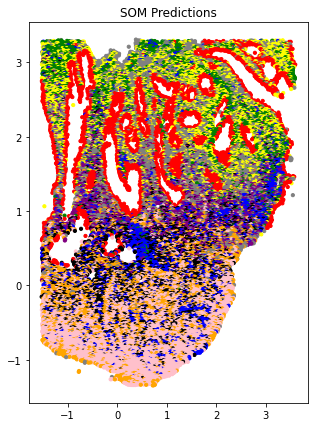

In [27]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,7))
x = df1['cx']
y = df1['cy']
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'black', 'gray', 'orange', 'pink']

ax.scatter(x, y, c=predictions, cmap=ListedColormap(colors), s=10)
ax.title.set_text('SOM Predictions')

plt.show()

In [12]:
print(type(predictions))

<class 'numpy.ndarray'>


In [13]:
dfn2 = dfn[df['ImageNumber'] == '20210808_MBAA047_S8_R-2_D-S8_T42_R4']
dfn2['predictions'] = predictions

C:\Users\JANSUP~1\AppData\Local\Temp/ipykernel_13496/1625165882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn2['predictions'] = predictions


In [14]:
dfn2.head()

,ROInr,Cell_Area,Nucl_Area,X80ArAr_Mean,sSMA113_Mean,aSMA_Mean,X124Xe_Mean,X127I_Mean,X129Xe_Mean,X132Xe_Mean,...,phenocluster,index.x,index.y,Slide,Patient,cx,cy,nx,ny,predictions
335423,1,40,40,5.582013,0.431234,2.144078,0.518391,2.060704,2.842989,2.886293,...,7,42,42,8,4,681.150000,1929.700000,681.150000,1929.700000,2
335424,2,44,24,5.588163,0.392007,1.751822,0.185883,2.120117,2.842658,2.835196,...,10,42,42,8,4,145.500000,1927.500000,145.833333,1927.250000,2
335425,3,128,58,5.592929,0.329207,1.828205,0.510717,2.094366,2.857638,2.837593,...,19,42,42,8,4,1578.921875,1925.406250,1578.465517,1925.396552,2
335426,4,82,40,5.596349,0.000000,0.590283,0.525378,2.085230,2.832226,2.878944,...,4,42,42,8,4,1504.939024,1924.500000,1504.650000,1925.200000,2
335427,5,142,74,5.588154,0.272081,1.809832,0.563553,2.090309,2.837856,2.845218,...,10,42,42,8,4,1663.514085,1923.612676,1663.716216,1924.500000,2


In [15]:
col = ["X80ArAr_Mean","sSMA113_Mean","aSMA_Mean","X124Xe_Mean","X127I_Mean","X129Xe_Mean","X132Xe_Mean","RORgt_Mean","Ecad_Mean","CD20_Mean","GATA3_Mean","GATA3_Nucl_Mean","Tbet_Mean","Tbet_Nucl_Mean","CD16_Mean","BetaCatenin_Mean","PanKeratin_Mean","CTLA4_Mean","PDL1_Mean","IFNg_Mean","CD45RO_Mean","AKT_Mean","HLA_DR-DP-DQ_Mean","FOXP3_Mean","FOXP3_Nucl_Mean","CD4_Mean","CD103_Mean","pSTAT3_Mean","CD68_Mean","IL10_Mean","CD45_Mean","CD8a_Mean","ICOS_Mean","pS6_Mean","PD1_Mean","NFkB_Mean","NFkB_Nucl_Mean","IL17a_Mean","Ki67_Mean","Ki67_Nucl_Mean","GranzymeB_Mean","CD3_Mean","pERK_Mean","Cleaved Caspase 3_Mean","ERK_Mean","TCRgd_Mean","pAKT_Mean","H3_Mean","H3_Nucl_Mean","Ir193_Mean","Ir193_Nucl_Mean"]
dfn3 = dfn2.drop('predictions', axis=1)[col].iloc[0:0]
for i in range(Som_M*Som_N):
    mask = dfn2['predictions'] == i
    myList = []
    for column in dfn2.drop('predictions', axis=1)[mask][col]:
        myList.append(dfn2[mask][column].mean())
    dfn3.loc[len(dfn3)] = myList
dfn3[["PanKeratin_Mean", "Ecad_Mean"]].head(Som_M*Som_N)

,PanKeratin_Mean,Ecad_Mean
0,2.267643,1.959758
1,0.760140,0.858343
2,0.357093,0.542452
3,0.371514,0.682132
4,0.325399,0.608765
5,0.286633,0.501512
6,0.289226,0.602124
7,0.273896,0.580988
8,0.217178,0.476357
9,0.361853,0.696373


In [16]:
for col in dfn3[["PanKeratin_Mean", "Ecad_Mean","aSMA_Mean","CD45_Mean", "CD3_Mean","CD68_Mean","CD20_Mean","CD4_Mean", "IL17a_Mean"]]:
    string = col
    string += "-"
    count = 0
    for x in dfn3[col].tolist():
        if abs(x - dfn3[col].mean()) > dfn3[col].std():
            string += str(count)
            string += "-"
        count = count + 1
    print(string)

PanKeratin_Mean-0-
Ecad_Mean-0-
aSMA_Mean-2-5-9-
CD45_Mean-0-6-9-
CD3_Mean-3-6-11-
CD68_Mean-0-2-9-10-
CD20_Mean-6-
CD4_Mean-3-6-11-
IL17a_Mean-9-10-11-


array([[<AxesSubplot:title={'center':'aSMA_Mean'}>]], dtype=object)

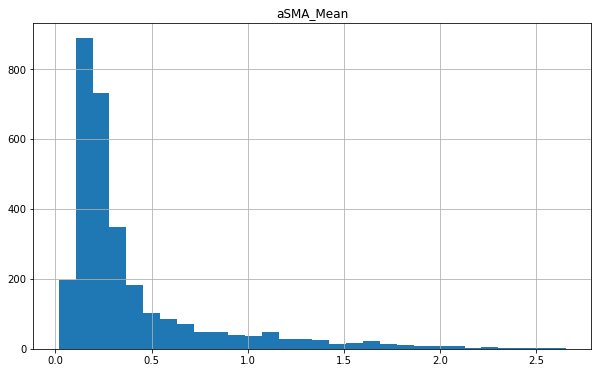

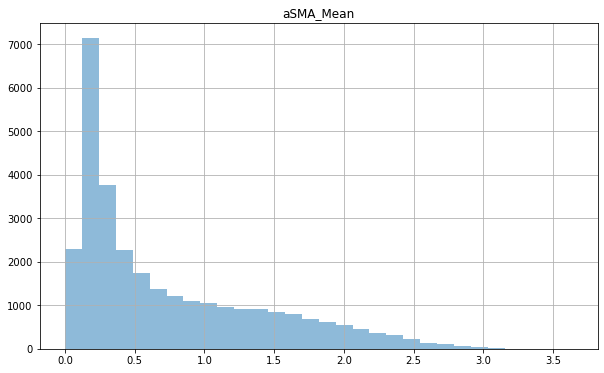

In [17]:
mask = dfn2['predictions'] == 0
cluster1 = dfn2[mask]
cluster1[["aSMA_Mean"]].hist(bins = 30)
dfn2[["aSMA_Mean"]].hist(bins = 30, alpha=0.5)

In [169]:
important_markers = ["PanKeratin_Mean", "Ecad_Mean", # epithelium
                     "aSMA_Mean", #fibroblasts
                     "CD45_Mean", "CD3_Mean", # T-Cells
                     "CD45_Mean", "CD68_Mean", # macrophage
                     "CD45_Mean", "CD20_Mean", # B-Cells
                     "CD45_Mean", "CD3_Mean", "CD4_Mean", "IL17a_Mean" #IL17
                    ]

Cluster 0 = Epithelium \
cluster 2, 5 = Fibroblasts \
cluster 3, 6 = T-cells \
cluster 10, 11 = macrophage \
cluster 1 = B-Cells \
cluster 9 = IL17